# 3. Resolva o problema de classificação binária sobre o dataset "[Pima Indians Diabetes Database](https://www.kaggle.com/uciml/pima-indians-diabetes-database)". 

### Context
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

### Content
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

### Acknowledgements
Smith, J.W., Everhart, J.E., Dickson, W.C., Knowler, W.C., & Johannes, R.S. (1988). Using the ADAP learning algorithm to forecast the onset of diabetes mellitus. In Proceedings of the Symposium on Computer Applications and Medical Care (pp. 261--265). IEEE Computer Society Press.

### Inspiration
Can you build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not?

In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.shape

(768, 9)

In [4]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


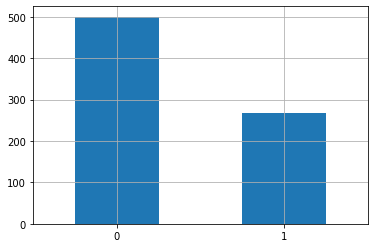

In [5]:
df['Outcome'].value_counts().plot.bar(grid=True, rot=0);

In [6]:
X = df.drop(columns=['Outcome'], axis=1)
y = df['Outcome']

### 1. Separe os dados em treino (80%) e teste (20%).

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 2. Use o algoritmo LogisticRegression.

- Crie modelos usando diferentes regularizações: Nenhuma, L1, L2, ElasticNet (penalty : None, ‘l2’ or ‘l1’ or ‘elasticnet’).
    - Ao usar L1, mostre que features foram descartadas. Dica: analise o impacto sobre os coeficientes (coef_).
    - Mostre o impacto de L2 sobre as features. Dica: compare regularização L2 com nenhuma regularização. 
    - OBS: Use diferentes valores de alpha para ver como eles afetam os resultados.
    - Alpha ajuda a controlar a complexidade do modelo. Ele controla a força da regularização.  
    - Alpha igual a zero pode gerar overfitting.  
    - Alpha muito grande pode levar a underfitting.  
    - Na literatura alpha às vezes é chamado de lambda.  
    - Perceba que a implementação de LogisticRegression do scikit learn usa o hiperparâmetro C, que é o inverso de alpha (C=1/alpha).  
- Usar a seguinte métrica: Accuracy.

In [8]:
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

### Usar L1, mostre que features foram descartadas. Dica: analise o impacto sobre os coeficientes (coef_)

In [9]:
model = LogisticRegression(penalty='l1', random_state=16, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(penalty='l1', random_state=16, solver='liblinear')

In [10]:
model.score(X_test, y_test)

0.7445887445887446

In [11]:
model.coef_[0]

array([ 0.05669612,  0.03380266, -0.01198747, -0.00128137, -0.00082526,
        0.09897499,  0.26974699,  0.03323423])

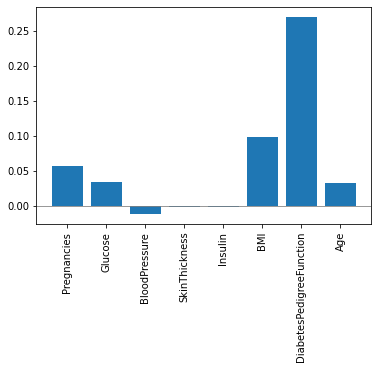

In [12]:
plt.bar(X.columns.values, model.coef_[0])
plt.axhline(0, color='grey', linewidth=0.8)
plt.xticks(rotation=90);

In [13]:
valores_alpha = np.logspace(-4, 0, 5)

In [14]:
result = []
for alpha in valores_alpha:
    model = LogisticRegression(C=alpha, penalty='l1', random_state=16, solver='liblinear')
    model.fit(X_train, y_train)
    res = model.score(X_test, y_test)
    result.append(res)

In [15]:
pd.DataFrame(result, index=valores_alpha, columns=['alpha']).idxmax()

alpha    0.1
dtype: float64

In [16]:
model = LogisticRegression(C=0.1, penalty='l1', random_state=16, solver='liblinear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7662337662337663

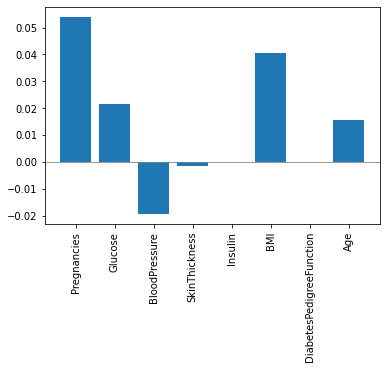

In [17]:
plt.bar(X.columns.values, model.coef_[0])
plt.axhline(0, color='grey', linewidth=0.8)
plt.xticks(rotation=90);

### Mostre o impacto de L2 sobre as features. Dica: compare regularização L2 com nenhuma regularização.

In [18]:
model = LogisticRegression(penalty='l2', random_state=16, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=16, solver='liblinear')

In [19]:
res_l2 = model.score(X_test, y_test)

In [20]:
res_l2

0.7532467532467533

In [21]:
model = LogisticRegression(penalty='none', random_state=16)
model.fit(X_train, y_train)

LogisticRegression(penalty='none', random_state=16)

In [22]:
res_none = model.score(X_test, y_test)

In [23]:
res_none

0.7402597402597403

#### Diferentes valores de alpha com l2

In [24]:
valores_alpha = np.logspace(-4, 0, 5)

In [25]:
result = []
for alpha in valores_alpha:
    model = LogisticRegression(C=alpha, penalty='l2', random_state=16, solver='liblinear')
    model.fit(X_train, y_train)
    res = model.score(X_test, y_test)
    result.append(res)

In [26]:
pd.DataFrame(result, index=valores_alpha, columns=['alpha']).idxmax()

alpha    1.0
dtype: float64

In [27]:
model = LogisticRegression(C=1.0, penalty='l1', random_state=16, solver='liblinear')
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7445887445887446

In [28]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7445887445887446

#### Diferentes valores de alpha sem regularização

In [29]:
result = []
for alpha in valores_alpha:
    model = LogisticRegression(C=alpha, penalty='none', random_state=16)
    model.fit(X_train, y_train)
    res = model.score(X_test, y_test)
    result.append(res)

In [30]:
pd.DataFrame(result, index=valores_alpha, columns=['alpha']).idxmax()

alpha    0.0001
dtype: float64

In [31]:
model = LogisticRegression(C=0.0001, penalty='none', random_state=16)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7402597402597403

In [32]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.7402597402597403